In [1]:
#check frequencies of the tempalate

import matplotlib.pyplot as plt 

from constants import *
from template import *
from GW_class import *


print("times_full length:", waveform.times_full.shape)
print("times_full range:", waveform.times_full.min(), waveform.times_full.max())
print("window_min, window_max:", c.window_min, c.window_max)
print("times after cut length:", waveform.times.shape)


#print template frequencies 
print(waveform.freqs)
#print frequency spacing
print('frequency spacing:', (waveform.df))
print('sampling rate:' ,(waveform.sampling_freq))
print('Number of time samples:', waveform.Nt)



#create time domain waveform
FD_template= waveform.get_FD_waveform(params_inj, phic=3.035)
TD_template= waveform.iFFT_waveform(FD_template)

#go back to FD to check freqs
TD_to_FD = np.fft.fft(TD_template)
freqs_from_TD = np.fft.fftfreq(len(TD_template), d=1/waveform.sampling_freq)

print(FD_template.size)

print(freqs_from_TD)

#plt.plot(waveform.times, TD_template)



/Users/pipermorris/Library/Python/3.9/lib/python/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


times_full length: (16383,)
times_full range: -0.32 3.6797558593749997
window_min, window_max: -0.32 0.32
times after cut length: (2622,)
[0.00000000e+00 2.50015260e-01 5.00030519e-01 ... 2.04737496e+03
 2.04762498e+03 2.04787499e+03]
frequency spacing: 0.2500152597204419
sampling rate: 4095.7499847402796
Number of time samples: 2622
8192
[ 0.          0.25001526  0.50003052 ... -0.75004578 -0.50003052
 -0.25001526]


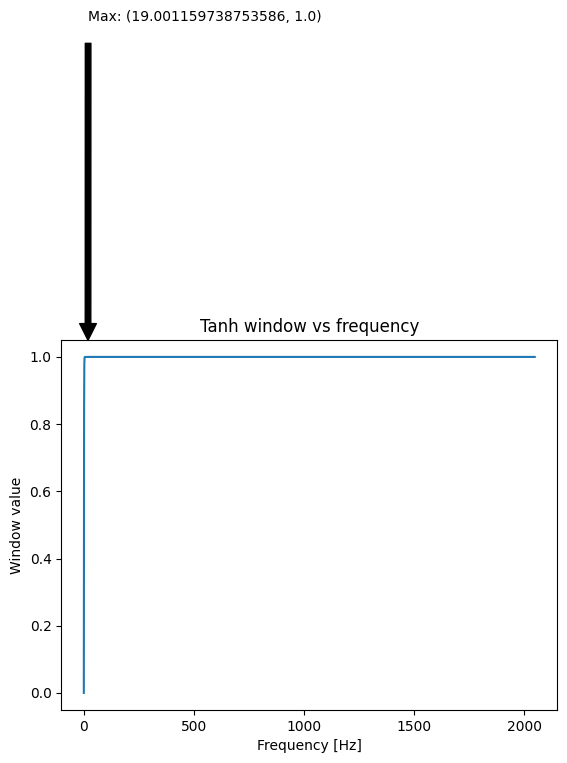

In [2]:
import matplotlib.pyplot as plt

max_index = np.argmax(waveform.tanh_window)
xmax = waveform.freqs[max_index]
ymax = waveform.tanh_window[max_index]

plt.annotate(f'Max: ({xmax}, {ymax})', xy=(xmax, ymax), xytext=(xmax + 0.5, ymax + 1),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(waveform.freqs, waveform.tanh_window)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Window value")
plt.title("Tanh window vs frequency")
plt.show()

In [3]:
#check frequencies of GW150914

from get_data import *
from numpy.fft import rfftfreq, rfft

#choose detector 
det= 'H1'
#get time domain info from dictionary
dt = GW150914_data['dt']
fs = GW150914_data['fs']
strain = GW150914_data[det]['strain']
N = len(strain)

print('number of samples:', N)
print('sampling rate', fs)

#check frequency spacing
print('frequency spacing:', fs/N)
#fft to get freqs 
freqs_150914= rfftfreq(N,dt)
print(f'GW150914 frequencies:', freqs_150914)

#frequences greater than 16
freqs_150914_filter= freqs_150914[freqs_150914 >= 16]
print(f'frequencies greater than 16:', freqs_150914_filter)



number of samples: 131072
sampling rate 4096
frequency spacing: 0.03125
GW150914 frequencies: [0.00000000e+00 3.12500000e-02 6.25000000e-02 ... 2.04793750e+03
 2.04796875e+03 2.04800000e+03]
frequencies greater than 16: [  16.        16.03125   16.0625  ... 2047.9375  2047.96875 2048.     ]


In [13]:
#double check with matched filter frequencies

from matched_filter import *
from constants import signal_ref_params

#choose detector
det= 'H1'
data=  GW150914.dictionary[det]['strain']
dwindow= tukey(data.size, alpha= 1./4)
data_fft = np.fft.fft(data*dwindow) / fs

print(f'FD_template length:', len(FD_template))
print(f"data length:", len(data_fft))

# #check GW150914
# SNRmax, timemax, d_eff, horizon, phase, offset= matched_filter(
#     get_template(signal_ref_params['GW150914'][1], GW150914.dictionary),  
#     GW150914.dictionary[det]['strain'],   
#     GW150914.dictionary['time'],   
#     GW150914.dictionary['large_data_psds'][det],      
#     GW150914.dictionary['fs']        )

template= get_template(signal_ref_params['GW150914'][1], GW150914.dictionary)
fft_template = np.fft.irfft(template)


calculate_matched_filter(get_template(signal_ref_params['GW150914'][1], GW150914.dictionary), GW150914.dictionary, det = 'H1')


template_wbp, strain_whitenbp, times, SNRmax, amp, phase = wrapped_matched_filter(signal_ref_params['GW150914'][1], GW150914, det = 'H1')



print(len(FD_template))

print('fft template shaoe:', fft_template.shape)
print(template_wbp.shape)
print(strain_whitenbp.shape)
print(times.shape)



FD_template length: 8192
data length: 131072
(8192,)
(8192,)
(8192,)
(8192,)
8192
(16382,)
(16383,)
(16383,)


In [5]:
c.freqs

array([0.00000000e+00, 2.50015260e-01, 5.00030519e-01, ...,
       2.04737496e+03, 2.04762498e+03, 2.04787499e+03])